In [1]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ratio import get_ratio
from IPython.display import display
from matplotlib import pyplot as plt

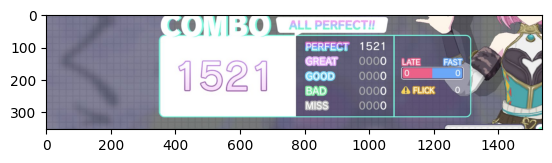

In [35]:
full_img = cv2.imread('../targets/fastlate.png')
full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)

full_img_shape = full_img.shape

full_img = full_img[
  full_img.shape[0] // 2 : full_img.shape[0] // 8 * 7,
  0 : full_img.shape[1] // 4 * 3
]

cropped_full_img_shape = full_img.shape

plt.imshow(full_img)

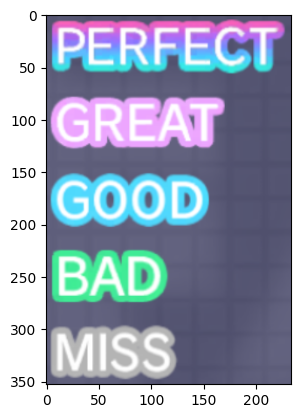

In [36]:
face_img = cv2.imread('./img2.png')
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

face_img_shape = face_img.shape

if full_img.shape[0] <= face_img.shape[0]:
  ratio = 1 - (face_img.shape[0] - full_img.shape[0]) / face_img.shape[0]
else:
  ratio = 1

face_img = cv2.resize(face_img, None, None, ratio, ratio)

resized_face_img_shape = face_img.shape

plt.imshow(face_img)

In [37]:
search_target_ratio = get_ratio(search_content=face_img, search_target=full_img)['search_target']

full_img = cv2.resize(full_img, None, None, search_target_ratio, search_target_ratio)

resized_full_img_shape = full_img.shape

(10, 1203, 3)


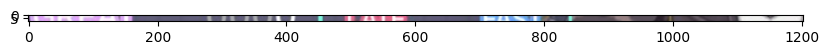

In [38]:
param = "TM_CCOEFF_NORMED"

fig = plt.figure(figsize=(10, 10))

result = cv2.matchTemplate(full_img, face_img, getattr(cv2, param))
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)

tl = maxLoc
br = (tl[0] + face_img.shape[1], tl[1] + face_img.shape[0])

dst = full_img.copy()

dst = dst[
  tl[1] + face_img.shape[0] // 10 * 3 - 5 : tl[1] + face_img.shape[0] // 10 * 3 + 5,
  tl[0] : dst.shape[1]
]

plt.imshow(dst)
print(dst.shape)

二つの画像の拡大縮小をなかったことにする

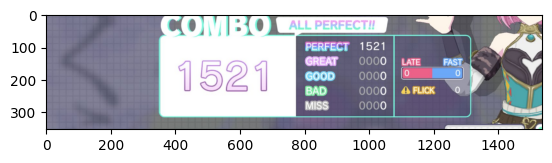

In [39]:
full_img = cv2.resize(full_img, None, None, 1/search_target_ratio, 1/search_target_ratio)

plt.imshow(full_img)

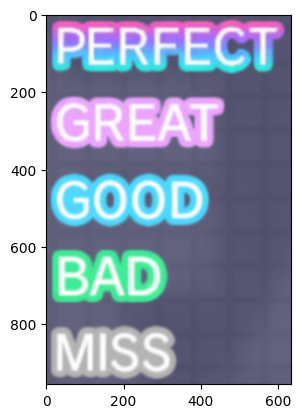

In [46]:
face_img = cv2.imread('./img2.png')
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

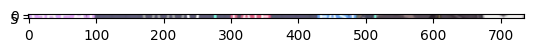

In [14]:
dst = cv2.resize(dst, None, None, 1 / search_target_ratio, 1 / search_target_ratio)

plt.imshow(dst)

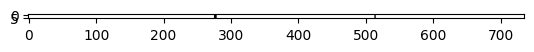

In [15]:
np_dst = np.full((dst.shape[0], dst.shape[1]), 0)
color_range = 25

for y in range(dst.shape[0]):
  for x in range(dst.shape[1]):
    r, g, b = dst[y][x]

    # if r<=25 and 230 <= g <= 255 and 210<=b<=221:
    if r<=70 and 215 <= g <= 255 and 205<=b<=236:
        a = 0
    elif 114-color_range < r < 144+color_range and 241-color_range < g < 241+color_range and 219-color_range < b < 219+color_range:
        a = 0
    elif 108-color_range < r < 108+color_range and 193-color_range < g < 193+color_range and 190-color_range < b < 190+color_range:
        a = 0
    elif 115-color_range < r < 115+color_range and 233-color_range < g < 233+color_range and 215-color_range < b < 215+color_range:
        a = 0
    else:
        a = 255
    
    np_dst[y][x] = a

plt.imshow(np_dst, cmap='gray')

In [13]:
for x in range(np_dst.shape[1]):
  b = False
  for y in range(np_dst.shape[0]):
    if np_dst[y][x] == 0:
      b = True
    else:
      b = False
      break
  if b:
    print(x)

276
277
278
279
514
515


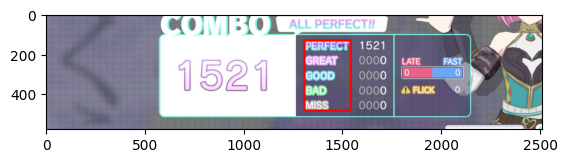

In [15]:
cv2.rectangle(full_img, tl, br, 255, 10)
plt.imshow(full_img)

In [27]:
print(full_img_shape)
print(cropped_full_img_shape)
print(resized_full_img_shape)
print(face_img_shape)
print(resized_face_img_shape)

(946, 2048, 3)
(353, 1536, 3)
(353, 1536, 3)
(407, 270, 3)
(353, 234, 3)
